# MGSC 404 Foundations of Decision Analytics 

## Last Name:  Toronga
## First Name: Nicholas Tariro
## Student ID: 260715831

# Lab 3:  Table Manipulation and Visualization

Please complete this notebook by filling in the cells provided. 

**Reading**: Textbook chapter [7](https://www.inferentialthinking.com/chapters/07/visualization.html).

You **must** provide your answer in the designated space. No need to write explanations for your answers unless required. 

Deadline:

This lab assignment is **due Thursday, September 27 at the beginging of class**. Please submit a printed **hard copy**. Late work will not be accepted. 

Tips: 

1. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies to learn more about how to learn cooperatively. Also, questions that puzzle you are likely to have puzzled many Python learners in the past. **Try Googling your questions for answers from online**. In addtion, [this documentation](http://data8.org/datascience/) is a great reference for table operations.  

2. You should start early so that you have time to get help if you're stuck. Drop-in office hours are Thuesday and Thursday 2:30pm-3:30pm in my office 524 Bronfman, right after our class meeting time. 

3. You will get a much smoother start if you play with the lecture notebook before starting. 

In [169]:
import tables
import numpy as np
from datascience import *


# These lines do some fancy plotting magic",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plots.style.use('fivethirtyeight')
from datetime import *



## 1. Differences between Universities, Part II


**Question 1.** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year)
* The average Yelp review of nearby Thai restaurants
* The USA Today ranking of the Medical school
* The USA Today ranking of the Engineering school

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for Stanford and Berkeley.  Compute the dissimilarity (according to the above method) between Stanford and Berkeley.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

*Note:* The data we're using aren't real -- we made them up for this exercise, except for the cost-of-attendance numbers, which we estimated for a student from a median-income family living in California.

In [2]:
stanford = Table.read_table("stanford.csv").column("Trait value")
berkeley = Table.read_table("berkeley.csv").column("Trait value")


dissimilarity = sum(abs(stanford-berkeley))
dissimilarity




14060.558701067917

**Question 2.** Why do we sum up the absolute values of the differences in trait values, rather than just summing up the differences?

*We want to know the magnitude of the difference regardless of direction. If we do not find the absolute value, some differences may cancel out and reduce the dissimilarity, in error.*



##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by \$900, but are otherwise identical, get a dissimilarity of 900.  But two schools that differ in graduation rate by .9 (a huge difference!), but are otherwise identical, get a dissimilarity of only .9.

One way to fix this problem is to assign different "weights" to different traits.  For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by .001, so that a difference of \$900 in cost-to-attend results in a dissimilarity of $900 \times .001$, or $.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. *Now multiply that absolute value by a trait-specific number, like .001 or 2.*
4. Now sum the 1000 resulting numbers.

**Question 3.** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between Berkeley and Stanford.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [3]:
weights = Table.read_table("weights.csv").column("Weight")

revised_dissimilarity = sum(abs(stanford-berkeley) * weights)
revised_dissimilarity

505.98313211458805

## 2. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [4]:
unemployment = Table.read_table("unemployment.csv")
unemployment

Date       | NEI     | NEI-PTER
1994-01-01 | 10.0974 | 11.172
1994-04-01 | 9.6239  | 10.7883
1994-07-01 | 9.3276  | 10.4831
1994-10-01 | 9.1071  | 10.2361
1995-01-01 | 8.9693  | 10.1832
1995-04-01 | 9.0314  | 10.1071
1995-07-01 | 8.9802  | 10.1084
1995-10-01 | 8.9932  | 10.1046
1996-01-01 | 9.0002  | 10.0531
1996-04-01 | 8.9038  | 9.9782
... (80 rows omitted)

**Question 2.** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [159]:
by_nei = unemployment.sort("NEI", descending = True)
by_nei_pter = unemployment.sort("NEI-PTER", descending= True)
#by_nei.show()
by_nei_pter

Date       | NEI     | NEI-PTER
2009-10-01 | 10.9698 | 12.8557
2009-07-01 | 10.8089 | 12.7404
2010-01-01 | 10.9054 | 12.7311
2010-04-01 | 10.6597 | 12.5664
2009-04-01 | 10.7082 | 12.5497
2010-10-01 | 10.5856 | 12.4329
2010-07-01 | 10.5521 | 12.3897
2011-01-01 | 10.5024 | 12.3017
2011-07-01 | 10.4856 | 12.2507
2011-04-01 | 10.4409 | 12.247
... (80 rows omitted)

**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [163]:
greatest_nei = by_nei.take(np.arange(1,11,1))
greatest_nei


Date       | NEI     | NEI-PTER
2010-01-01 | 10.9054 | 12.7311
2009-07-01 | 10.8089 | 12.7404
2009-04-01 | 10.7082 | 12.5497
2010-04-01 | 10.6597 | 12.5664
2010-10-01 | 10.5856 | 12.4329
2010-07-01 | 10.5521 | 12.3897
2011-01-01 | 10.5024 | 12.3017
2011-07-01 | 10.4856 | 12.2507
2011-04-01 | 10.4409 | 12.247
2011-10-01 | 10.3287 | 12.1214

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [164]:
pter = unemployment[2]-unemployment[1]
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [166]:
by_pter = unemployment.with_columns("PTER", pter).sort("PTER", descending = True)
by_pter

Date       | NEI     | NEI-PTER | PTER
2009-07-01 | 10.8089 | 12.7404  | 1.9315
2010-04-01 | 10.6597 | 12.5664  | 1.9067
2009-10-01 | 10.9698 | 12.8557  | 1.8859
2010-10-01 | 10.5856 | 12.4329  | 1.8473
2009-04-01 | 10.7082 | 12.5497  | 1.8415
2010-07-01 | 10.5521 | 12.3897  | 1.8376
2010-01-01 | 10.9054 | 12.7311  | 1.8257
2011-04-01 | 10.4409 | 12.247   | 1.8061
2011-01-01 | 10.5024 | 12.3017  | 1.7993
2011-10-01 | 10.3287 | 12.1214  | 1.7927
... (80 rows omitted)

**Question 6.** Create a line plot of the PTER over time. To do this, first add the `year` array and the `pter` array to the `unemployment` table; label these columns "Year" and "PTER", respectively ("Year" has elements such as 1998.25, 1999.0). Then, generate a line plot using one of the table methods you've learned in class.

Text(0,0.5,'PTER')

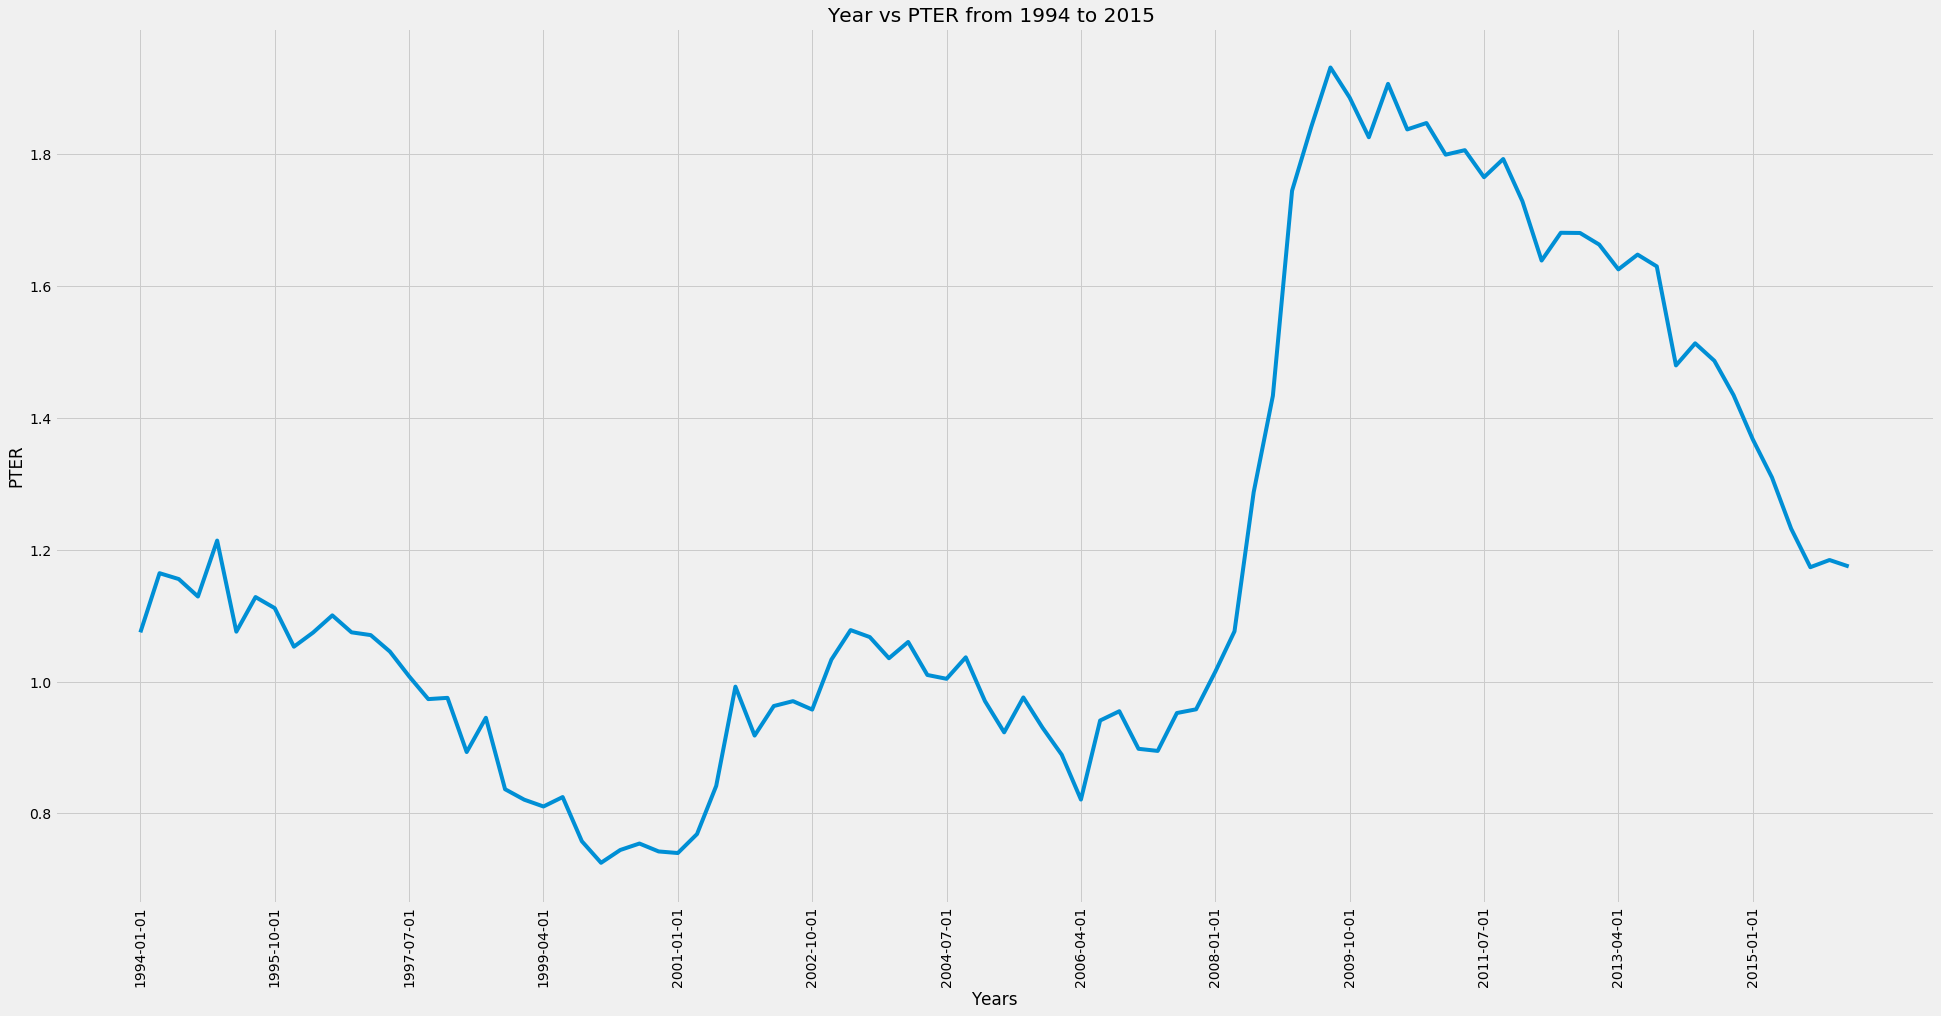

In [184]:
#Year = datetime.strptime(by_pter.column(0),'%Y-%d-%m').strftime('%d.%m.%Y')
unemployment = unemployment.with_columns("PTER", pter)
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(unemployment.column(0), unemployment.column(3))
plt.xticks(np.arange(0,90,step=7), rotation=90)
plt.title("Year vs PTER from 1994 to 2015 ")
plt.xlabel("Years")
plt.ylabel("PTER")

#I didn't see the point of changing year to the format mentioned above since we can still plot with the Date column given 
#in the table


**Question 7.** Were PTER rates high during or directly after the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011 or so)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

In [185]:
highPTER = True

## 3. Birth Rates


The following table gives census-based population estimates for each state of the United States on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.*

In [10]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
popn = pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0))
popn.show()
#file = pd.read_csv("nst-est2016-alldata.csv")
#file.loc



**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period.

In [25]:
us_birth_rate = sum(popn.column(4))/sum(popn.column(2))
#in percentage
us_birth_rate



0.012358536498646102

**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*. First, create a new version of the `pop` table, called `growth_rates`, which includes a column with the growth rate of each state. Making intermediate tables can improve the readability of the code and make it easier to follow when revisting at a later time.

In [38]:
growth = ((popn.column(3)- popn.column(2))/pop.column(2))*100
growth_rates = popn.with_columns("growth_rates", growth).sort("growth_rates", descending = True).show(5)
fastest_growth = np.array(("Utah", "Nevada", "Idaho", "Florida", "Washington"))
fastest_growth



array(['Utah', 'Nevada', 'Idaho', 'Florida', 'Washington'], dtype='<U10')

**Question 3.** Assign `movers` to the number of states for which the absolute annual rate of migration was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [124]:
migration_rates = abs((popn.column(6)/popn.column(2))*100)
popn = popn.with_columns("migration_rates", migration_rates)
movers_table = popn.where("migration_rates", are.above(1))
movers = movers_table.num_rows
movers




9

**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). *Hint:* Make sure you double check the type of the values in the region column.

In [111]:
regional_births = popn.select(0 , 4).group("REGION", sum).sort("REGION", descending = True)
west_births = regional_births["BIRTHS sum"][1]
west_births




979657

**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *number of babies born in region 4 (the Western US)* during this time interval.

In [123]:
regional_births_below = regional_births.where("BIRTHS sum", are.below(west_births))
less_than_west_births = regional_births_below.num_rows
less_than_west_births

3

**Question 6.** 

In the code cell below, create a visualization that will show if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

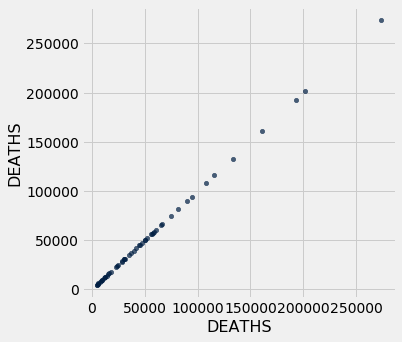

In [135]:
# Generate your chart in this cell
popn.select(4,5).scatter("DEATHS", "DEATHS")



**Question 7.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign your answer to `assoc` in the cell below, and write one sentence to explain your answer.

In [138]:
assoc = True
explanation = When there are many births there seems to be corresponding many deaths also

## 4. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following histograms to the code that produced them. Explain your reasoning.

**Histogram A:** ![](var1.png)
**Histogram B:** ![](var2.png)

**Line 1:** `t.hist('x')`

**Histogram for Line 1:* B*  

**Explanation:*There are many points that are corresponding to the x_value close to -0.5 because of the overlap of both the positive and y values in the distribution.*

**Line 2:** `t.hist('y')`

**Histogram for Line 2:*A* 

**Explanation: There are is no distribution of y_values in the region between -0.5 and 0.5 which is what the scatter shows.*

200

# (For instructor use only) 



## Your Grade: 